
# FISHER LINEAR DISCRIMINENT

$J(w) = \frac{(m1 −m2)^2}{s^2_1+s^2_1}$


LINEAR DISCRIMINENT ANALYSIS

I.Datapreprocessing

II.Find Variance between Classes(SB)

    II(a). Find overall mean and Three classwise means
    II(b). Normalise Three classes means with respect to overall mean
    II(c). Find covariance OF   Three classes(SB=VARIANCE BETWEEN CLASS and Total)
    II(d). SB=COVARIANCE BETWEEN CLASSES



III.Find variance Within Classes(SW)

    III(a)Normalise Three classes with self mean
    III(b)Self covariance of Three classes
    III(C) SW=COVARIANCE WITHIN THREE CLASSES

IV.Find Fisher Linear Discriminent(SB/SW)

V.Eigen decomposition of Fisher Linear Discriminent

VI.Select Largest Eigen vectors

    VI(a).Sort Eigen values and Eigen vectors
    VI(b).Select biggest two columns of Eigen vectors

VII.Calculate Input projection on selected Eigen Vectors

VIII.Plot the Projections 

# I.Datapreprocessing


In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import pandas as pd

data = datasets.load_iris()
X, y = data.data, data.target



In [ ]:
print("data type",type(data))
print("data type",type(data.data))
print("data type",type(data.target))


data type <class 'sklearn.utils.Bunch'>
data type <class 'numpy.ndarray'>
data type <class 'numpy.ndarray'>


In [ ]:
print("feature Names",list(data.feature_names))


feature Names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print("\n Target names \n",list(data.target_names))



 Target names 
 ['setosa', 'versicolor', 'virginica']


### Three classes are SETOSA VERSICOLOR and VIRGINICA



In [ ]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target


In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


 ### Three classes  targets represented as:

 target setosa=0

 target versicolor=1

 target virginica=2

### Get Three classes data

In [ ]:
df_setosa=df[df.target==0]
df_versi=df[df.target==1]
df_virg=df[df.target==2]

### Drop target from All classes

In [ ]:
df.drop('target', axis=1, inplace=True)
df_setosa.drop('target', axis=1, inplace=True)
df_versi.drop('target', axis=1, inplace=True)
df_virg.drop('target', axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#II.Find Variance between Classes(SB)



### II(a). Find overall mean and Three classwise means

In [ ]:
mean_all=df.mean(axis=0)
mean_setosa=df_setosa.mean(axis=0)
mean_versi=df_versi.mean(axis=0)
mean_virg=df_virg.mean(axis=0)

In [ ]:
print("\n Mean All \n",mean_all.to_numpy())
print("\n Mean setosa \n",mean_setosa.to_numpy())
print("\n Mean versi \n",mean_versi.to_numpy())
print("\n Mean virg \n",mean_virg.to_numpy())


 Mean All 
 [5.84333333 3.05733333 3.758      1.19933333]

 Mean setosa 
 [5.006 3.428 1.462 0.246]

 Mean versi 
 [5.936 2.77  4.26  1.326]

 Mean virg 
 [6.588 2.974 5.552 2.026]


### II(b). Normalise Three classes means with respect to overall mean

In [ ]:
mean_setosa_norm=((mean_setosa-mean_all).to_numpy()).reshape(4,1)
mean_versi_norm=((mean_versi-mean_all).to_numpy()).reshape(4,1)
mean_virg_norm=((mean_virg-mean_all).to_numpy()).reshape(4,1)
print("\n Mean setosa normalised \n",mean_setosa_norm)
print("\n Mean versi normmalised\n",mean_versi_norm)
print("\n Mean virg normalised\n",mean_virg_norm)


 Mean setosa normalised 
 [[-0.83733333]
 [ 0.37066667]
 [-2.296     ]
 [-0.95333333]]

 Mean versi normmalised
 [[ 0.09266667]
 [-0.28733333]
 [ 0.502     ]
 [ 0.12666667]]

 Mean virg normalised
 [[ 0.74466667]
 [-0.08333333]
 [ 1.794     ]
 [ 0.82666667]]


### II(c). Find covariance OF   Three classes(SB=VARIANCE BETWEEN CLASS and Total)

In [ ]:
setosa_cov=mean_setosa_norm.dot(mean_setosa_norm.T)
versi_cov=mean_setosa_norm.dot(mean_setosa_norm.T)
virg_cov=mean_setosa_norm.dot(mean_setosa_norm.T)


In [ ]:
print("\n setosa Covariance \n",setosa_cov)
print("\n versi Covariance \n",versi_cov)
print("\n virg Covariance \n",virg_cov)


 setosa Covariance 
 [[ 0.70112711 -0.31037156  1.92251733  0.79825778]
 [-0.31037156  0.13739378 -0.85105067 -0.35336889]
 [ 1.92251733 -0.85105067  5.271616    2.18885333]
 [ 0.79825778 -0.35336889  2.18885333  0.90884444]]

 versi Covariance 
 [[ 0.70112711 -0.31037156  1.92251733  0.79825778]
 [-0.31037156  0.13739378 -0.85105067 -0.35336889]
 [ 1.92251733 -0.85105067  5.271616    2.18885333]
 [ 0.79825778 -0.35336889  2.18885333  0.90884444]]

 virg Covariance 
 [[ 0.70112711 -0.31037156  1.92251733  0.79825778]
 [-0.31037156  0.13739378 -0.85105067 -0.35336889]
 [ 1.92251733 -0.85105067  5.271616    2.18885333]
 [ 0.79825778 -0.35336889  2.18885333  0.90884444]]


### II(d). SB=COVARIANCE BETWEEN CLASSES

In [ ]:
SB=setosa_cov+versi_cov+virg_cov

In [ ]:
print("\n SB=VARIANCE BETWEEN CLASSES \n",SB)


 SB=VARIANCE BETWEEN CLASSES 
 [[ 2.10338133 -0.93111467  5.767552    2.39477333]
 [-0.93111467  0.41218133 -2.553152   -1.06010667]
 [ 5.767552   -2.553152   15.814848    6.56656   ]
 [ 2.39477333 -1.06010667  6.56656     2.72653333]]


# III.Find variance Within Classes(SW)



### III(a)Normalise Three classes with self mean

In [ ]:
setosa_self_norm=(df_setosa-mean_setosa).to_numpy()
versi_self_norm=(df_versi-mean_versi).to_numpy()
virg_self_norm=(df_virg-mean_virg).to_numpy()

In [ ]:
print("\n setosa self norm \n",setosa_self_norm)
print("\n versi self norm \n",versi_self_norm)
print("\n  virg self norm \n",virg_self_norm)


 setosa self norm 
 [[ 0.094  0.072 -0.062 -0.046]
 [-0.106 -0.428 -0.062 -0.046]
 [-0.306 -0.228 -0.162 -0.046]
 [-0.406 -0.328  0.038 -0.046]
 [-0.006  0.172 -0.062 -0.046]
 [ 0.394  0.472  0.238  0.154]
 [-0.406 -0.028 -0.062  0.054]
 [-0.006 -0.028  0.038 -0.046]
 [-0.606 -0.528 -0.062 -0.046]
 [-0.106 -0.328  0.038 -0.146]
 [ 0.394  0.272  0.038 -0.046]
 [-0.206 -0.028  0.138 -0.046]
 [-0.206 -0.428 -0.062 -0.146]
 [-0.706 -0.428 -0.362 -0.146]
 [ 0.794  0.572 -0.262 -0.046]
 [ 0.694  0.972  0.038  0.154]
 [ 0.394  0.472 -0.162  0.154]
 [ 0.094  0.072 -0.062  0.054]
 [ 0.694  0.372  0.238  0.054]
 [ 0.094  0.372  0.038  0.054]
 [ 0.394 -0.028  0.238 -0.046]
 [ 0.094  0.272  0.038  0.154]
 [-0.406  0.172 -0.462 -0.046]
 [ 0.094 -0.128  0.238  0.254]
 [-0.206 -0.028  0.438 -0.046]
 [-0.006 -0.428  0.138 -0.046]
 [-0.006 -0.028  0.138  0.154]
 [ 0.194  0.072  0.038 -0.046]
 [ 0.194 -0.028 -0.062 -0.046]
 [-0.306 -0.228  0.138 -0.046]
 [-0.206 -0.328  0.138 -0.046]
 [ 0.394 -0.028  0

### III(b)Self covariance of Three classes

In [ ]:
setosa_self_cov=setosa_self_norm.T.dot(setosa_self_norm)
versi_self_cov=versi_self_norm.T.dot(versi_self_norm)
virg_self_cov=virg_self_norm.T.dot(virg_self_norm)

In [ ]:
setosa_self_cov=df_setosa.shape[0]*setosa_self_cov
versi_self_cov=df_versi.shape[0]*versi_self_cov
virg_self_cov=df_virg.shape[0]*virg_self_cov

In [ ]:
print("\n setosa self Covariance \n",setosa_self_cov)
print("\n versi self Covariance \n",versi_self_cov)
print("\n  virg self Covariance \n",virg_self_cov)


 setosa self Covariance 
 [[304.41 243.08  40.07  25.31]
 [243.08 352.04  28.66  22.78]
 [ 40.07  28.66  73.89  14.87]
 [ 25.31  22.78  14.87  27.21]]

 versi self Covariance 
 [[652.76 208.7  448.1  136.66]
 [208.7  241.25 202.5  100.95]
 [448.1  202.5  541.   179.1 ]
 [136.66 100.95 179.1   95.81]]

  virg self Covariance 
 [[990.64 229.72 743.06 120.28]
 [229.72 254.81 174.88 116.69]
 [743.06 174.88 746.24 119.62]
 [120.28 116.69 119.62 184.81]]


### III(C) SW=COVARIANCE WITHIN THREE CLASSES

In [ ]:
SW=setosa_self_cov+versi_self_cov+virg_self_cov

In [ ]:
print("\n SW=VARIANCE WITHIN CLASSES \n",SW)


 SW=VARIANCE WITHIN CLASSES 
 [[1947.81  681.5  1231.23  282.25]
 [ 681.5   848.1   406.04  240.42]
 [1231.23  406.04 1361.13  313.59]
 [ 282.25  240.42  313.59  307.83]]


#IV.Find Fisher Linear Discriminent(SB/SW)



### Find Fisher Linear discriminent

In [ ]:
# Determine SW^-1 * SB
A = np.linalg.inv(SW).dot(SB)


#V.Eigen decomposition of Fisher Linear Discriminent



In [ ]:
# Get eigenvalues and eigenvectors of SW^-1 * SB
eigenvalues, eigenvectors = np.linalg.eig(A)

print("\n Eigen values of A=SB/SW \n",eigenvalues)
print("\n Eigen vectors of A=SB/SW \n",eigenvectors)


 Eigen values of A=SB/SW 
 [-3.46944695e-18  2.36415750e-02  3.05159329e-18 -7.79961482e-18]

 Eigen vectors of A=SB/SW 
 [[-0.93171237 -0.20981514 -0.01213632  0.48106263]
 [-0.14982791 -0.40334283  0.91828111 -0.61387121]
 [ 0.209159    0.56306453 -0.01157458 -0.45360707]
 [ 0.25635164  0.69010905  0.39557368  0.43125574]]


#VI.Select Largest Eigen vectors



### VI(a).Sort Eigen values and Eigen vectors

In [ ]:
# -> eigenvector v = [:,i] column vector, transpose for easier calculations
# sort eigenvalues high to low
eigenvectors = eigenvectors.T
idxs = np.argsort(abs(eigenvalues))[::-1]
eigenvalues = eigenvalues[idxs]
eigenvectors = eigenvectors[idxs]


In [ ]:
print("\n Sorted Eigen values of A=SB/SW \n",eigenvalues)
print("\n sorted Eigen vectors of A=SB/SW \n",eigenvectors)


 Sorted Eigen values of A=SB/SW 
 [ 2.36415750e-02 -7.79961482e-18 -3.46944695e-18  3.05159329e-18]

 sorted Eigen vectors of A=SB/SW 
 [[-0.20981514 -0.40334283  0.56306453  0.69010905]
 [ 0.48106263 -0.61387121 -0.45360707  0.43125574]
 [-0.93171237 -0.14982791  0.209159    0.25635164]
 [-0.01213632  0.91828111 -0.01157458  0.39557368]]


### VI(b).Select biggest two columns of Eigen vectors

In [ ]:
# store first n eigenvectors
linear_discriminants = eigenvectors[0 : 2]


#VII.Calculate Input projection on selected Eigen Vectors



### Calculate projection of input data onto Eigen vectors selected above

In [ ]:
X=df.to_numpy()
X_projected =np.dot(X, linear_discriminants.T)


In [ ]:
print("\n X_projected \n",X_projected)


 X_projected 
 [[-1.55544499e+00 -2.43928582e-01]
 [-1.31181054e+00 -3.32055040e-02]
 [-1.40682253e+00 -2.06831563e-01]
 [-1.23289383e+00 -2.84272120e-01]
 [-1.57479776e+00 -3.53421965e-01]
 [-1.47278549e+00 -3.94989250e-01]
 [-1.34119223e+00 -3.79947200e-01]
 [-1.43782274e+00 -2.76008431e-01]
 [-1.16656869e+00 -2.12349697e-01]
 [-1.36484928e+00 -1.83078906e-01]
 [-1.64275164e+00 -2.67744743e-01]
 [-1.33955326e+00 -4.17581664e-01]
 [-1.35983993e+00 -1.24437341e-01]
 [-1.42385172e+00 -2.28886532e-01]
 [-2.01659991e+00 -1.23398932e-01]
 [-1.85001436e+00 -4.66884651e-01]
 [-1.69801131e+00 -2.13546421e-01]
 [-1.48643408e+00 -2.00803008e-01]
 [-1.56440666e+00 -2.32408916e-01]
 [-1.55113048e+00 -4.30325077e-01]
 [-1.40913589e+00 -1.74304795e-01]
 [-1.44178529e+00 -3.25812382e-01]
 [-1.71609751e+00 -3.64404186e-01]
 [-1.09882435e+00 -1.27859740e-01]
 [-1.17063390e+00 -5.53663786e-01]
 [-1.22017915e+00 -7.58206560e-02]
 [-1.24349447e+00 -2.35117990e-01]
 [-1.52012005e+00 -2.41183027e-01]
 [-1

#VIII.Plot the Projections 

### plot reduced dimensions(Linear discriminents)

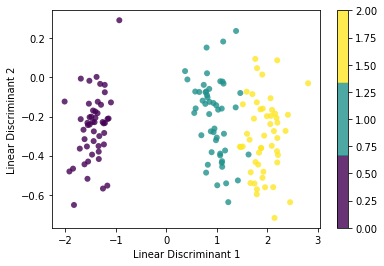

In [ ]:
x1, x2 = X_projected[:, 0], X_projected[:, 1]

plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()


### Following is Implemented using Funcgions 

In [ ]:
print("X datatype",type(X))
print("X shape",X.shape)


X datatype <class 'numpy.ndarray'>
X shape (150, 4)


In [ ]:
print("y datatype",type(y))
print("y shape",y.shape)

y datatype <class 'numpy.ndarray'>
y shape (150,)


In [ ]:
print("X \n",X[:5])
print("y \n",y[:5])

X 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y 
 [0 0 0 0 0]


In [ ]:
n_features = X.shape[1]
class_labels = np.unique(y)
print("\n class labels \n",class_labels)


 class labels 
 [0 1 2]


In [ ]:
n_components = 2


In [ ]:
mean_overall = np.mean(X, axis=0)
SW = np.zeros((n_features, n_features))
SB = np.zeros((n_features, n_features))


In [ ]:
for c in class_labels:
    X_c = X[y == c]
    mean_c = np.mean(X_c, axis=0)
    # (4, n_c) * (n_c, 4) = (4,4) -> transpose
    SW += (X_c - mean_c).T.dot((X_c - mean_c))

    # (4, 1) * (1, 4) = (4,4) -> reshape
    n_c = X_c.shape[0]
    mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
    SB += n_c * (mean_diff).dot(mean_diff.T)


In [ ]:
# Determine SW^-1 * SB
A = np.linalg.inv(SW).dot(SB)
# Get eigenvalues and eigenvectors of SW^-1 * SB
eigenvalues, eigenvectors = np.linalg.eig(A)
# -> eigenvector v = [:,i] column vector, transpose for easier calculations
# sort eigenvalues high to low
eigenvectors = eigenvectors.T
idxs = np.argsort(abs(eigenvalues))[::-1]
eigenvalues = eigenvalues[idxs]
eigenvectors = eigenvectors[idxs]
# store first n eigenvectors
linear_discriminants = eigenvectors[0 : n_components]


In [ ]:
X_projected =np.dot(X, linear_discriminants.T)


print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

    

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


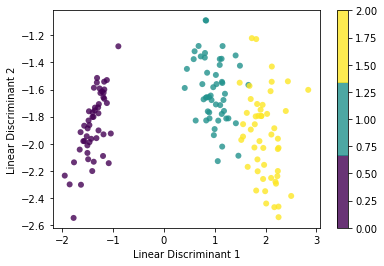

In [ ]:
x1, x2 = X_projected[:, 0], X_projected[:, 1]

plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()
